<a href="https://colab.research.google.com/github/SuwilanjiTrey/DataMining-11/blob/main/dataMiningGroup11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CRISP-DM Phase: Business Understanding — This stage defines the scope, objectives, and success criteria for the project before proceeding to Data Understanding.

##1. Business Understanding

###1.1 Problem Statement

###The Zambian judiciary produces a large number of legal judgments each year, each accompanied by descriptive information such as the case title, case number, court, judgment date, judges presiding, a brief case summary, and relevant keywords. Currently, classification of judgments by type (e.g., criminal, civil, constitutional, commercial) is often done manually, which is time-consuming, inconsistent, and resource-intensive. This lack of automation makes it difficult for legal practitioners, researchers, and the public to quickly locate relevant cases, reducing the efficiency of legal research and limiting access to timely legal information.


###1.2 Business Objectives


#### From a practical, real-world perspective, success means developing an automated solution that: Classifies judgments into correct categories using only their descriptive information. Reduces the time required to find relevant judgments for legal professionals, students, and researchers. Improves consistency and accuracy in classification compared to manual methods.Enhances public access to categorized legal information, supporting civic education and transparency.


###1.3 Data Mining Goals


####To achieve these business objectives, we will:
####Build a supervised machine learning classification model that predicts the type of judgment based on descriptive information fields:
        

####1.   Case Title
####2.   Case Number
####3.   Court
###4.   Judgment Date
###5.   Judges presiding
###6.   Case summary
###7.   Keywords


        
        

####Preprocess and encode the descriptive text to extract meaningful features for classification.
####Evaluate multiple algorithms (e.g., Logistic Regression, BERT-based models, etc) to determine the best performing classifier.










      














###1.4 Initial Project Success Criteria

####The following are the measures put in place to consider this project a successful:
Quantitative Criteria
1. The model achieves at least 80% accuracy on a held-out test set.

2. The model maintains a macro F1-score above 0.75, ensuring balanced performance across all classes.

Qualitative Criteria:
1. The predicted categories are meaningful and consistent with expert legal classification.

2. The classification process is significantly faster than manual sorting.

3. The model generalizes well to new, unseen judgments.

##2. Data Understanding

### 1.Load your datasets into a pandas dataframe

In [ ]:
from google.colab import drive
drive.mount('/content/drive/', force_remount=True)

Mounted at /content/drive/


In [ ]:
import pandas as pd
file_path = "/content/drive/MyDrive/Colab_Notebook/misc-unza25-csc4792-project_team11/Group_11_classification_of_judgements - Group_11_Classification_of_type.csv"
df = pd.read_csv(file_path)

### 2. Perform initial data exploration using commands like .head(), .info(), .describe(), and .shape

In [ ]:
df.head()

,CaseTitle,CaseNumber,Court,JudgementDate,JudgesPresiding,CaseSummary,Keywords
0,Chachinja Money Lenders v Mungole Chimpende,2024/SID/108,Subordiante Court of Zambia,15-Oct-24,Hon. Mondoka,"a lady borrowed K300,000 from the Chinese mone...",NaN
1,People v Elizabeth Nkonde and Billington Mosha,2SPR/223/22,Subordiante Court of Zambia,30-Jun-25,His Worship Mr Trevor Kasanda Kalisilira,A woman has dragged her daughter to the Lusaka...,NaN
2,Martin Sichilya v Dr. Kapaza Lungu,2024/SD/84,Subordiante Court of Zambia,15-Oct-24,Hon. Mondoka,This judgment arises from a claim in which the...,NaN
3,Enserve Limited v Zambian Breweries Plc,2024/HPC/0800,High Court of Zambia,12-Aug-25,Hon. Mrs. Justice K. E. Mwenda-Zimba,In Alfred Kunda v Geoffrey Mulenga (2022/CCZ/0...,"Constitutional Court, Grade 12 certificate, pa..."
4,Anne Mbewe- Anamela v Embassy of Ireland,2023/HP/1762,High Court of Zambia,1-Aug-25,Mulenga J,In Anne Mbewe-Anamela v Embassy of Ireland (20...,"diplomatic immunity, constructive dismissal, l..."


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   CaseTitle        17 non-null     object
 1   CaseNumber       17 non-null     object
 2   Court            17 non-null     object
 3   JudgementDate    17 non-null     object
 4   JudgesPresiding  16 non-null     object
 5   CaseSummary      17 non-null     object
 6   Keywords         5 non-null      object
dtypes: object(7)
memory usage: 1.2+ KB


In [ ]:
df.describe()

,CaseTitle,CaseNumber,Court,JudgementDate,JudgesPresiding,CaseSummary,Keywords
count,17,17,17,17,16,17,5
unique,17,17,5,12,14,17,5
top,Chachinja Money Lenders v Mungole Chimpende,2024/SID/108,High Court of Zambia,23 July 2025,Hon. Mondoka,"a lady borrowed K300,000 from the Chinese mone...","Constitutional Court, Grade 12 certificate, pa..."
freq,1,1,6,4,3,1,1


In [ ]:
df.shape

(19, 7)

### 3. Create initial visualizations (e.g., histograms for numerical columns, bar charts for categorical columns) to understand the distributions of key attributes

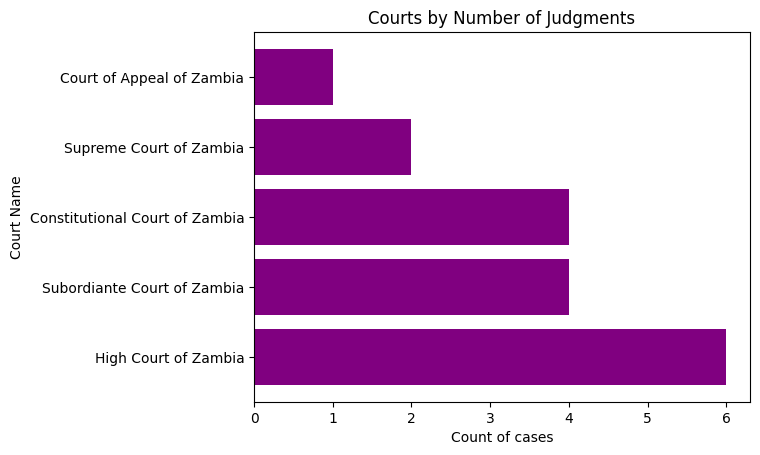

In [ ]:
import matplotlib.pyplot as plt
var_court_counts = df['Court'].value_counts()
plt.barh(var_court_counts.index,var_court_counts.values,color="purple")
plt.title("Courts by Number of Judgments")
plt.xlabel("Count of cases")
plt.ylabel("Court Name")
plt.show()

###4. Write a brief summary of your initial findings

#### Our initial findings for this are:
* For now the dataset contains 19 rows and 7 columns
* The columns include Case Title, Case Number, Court, Judgement Date, Judges Presiding, Case Summary, Keywords
* Some fields contain missing values that may need cleaning
* The distribution of judgement types is imbalanced, with High court cases being the most and court of appeal having the fewest
* Zambia legal information institute (Z.L.I.I.) was our main source of data
* Text-based fields will require preprocessing, possibly the following:
 * _Tokenization_
 * _Stopword removal_
 * _embeddings_

###3. Data preparation

In this phase, we clean, transform, and prepare our dataset for modeling.  
This involves:

1. **Data Cleaning** – Handling missing values, correcting inconsistencies, removing duplicates.  
2. **Feature Engineering** – Creating new variables that add predictive power.  
3. **Data Transformation** – Encoding categorical variables, scaling numerical features, etc.  

We carefully document each decision and provide rationale.

###  3.1 Data Cleaning
We start by checking missing values and duplicates.  
Since some features may have skewed distributions, we choose **median imputation** for numeric data and **mode imputation** for categorical data.


In [ ]:
# Check missing values
df.isnull().sum().sort_values(ascending=False).head(10)

# Fill numeric NaN with median
num_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[num_cols] = df[num_cols].fillna(df[num_cols].median())

# Fill categorical NaN with mode
cat_cols = df.select_dtypes(include=['object']).columns
for col in cat_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

# Drop duplicates
df.drop_duplicates(inplace=True)

df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 18 entries, 0 to 18
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   CaseTitle        18 non-null     object
 1   CaseNumber       18 non-null     object
 2   Court            18 non-null     object
 3   JudgementDate    18 non-null     object
 4   JudgesPresiding  18 non-null     object
 5   CaseSummary      18 non-null     object
 6   Keywords         18 non-null     object
dtypes: object(7)
memory usage: 1.1+ KB


/tmp/ipython-input-1207250018.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)


### 3.2 Feature Engineering
We create new variables to enhance predictive performance.  

Examples:
- `AverageQuizScore` = mean of Quiz1–Quiz10  
- `PassFail` = binary target (1 if Final Examination ≥ 50, else 0)  


In [ ]:
import pandas as pd

# Feature 1: Title length
df['CaseTitleLength'] = df['CaseTitle'].astype(str).apply(len)

# Feature 2: Number of judges
df['NumJudges'] = df['JudgesPresiding'].astype(str).apply(lambda x: len(x.split(',')))

# Feature 3: Summary length
df['CaseSummaryLength'] = df['CaseSummary'].astype(str).apply(len)

# Feature 4: Has keywords (binary)
df['HasKeywords'] = df['Keywords'].notnull().astype(int)

# Feature 5: Extract Year from JudgementDate
df['Year'] = pd.to_datetime(df['JudgementDate'], errors='coerce').dt.year

df.head()



/tmp/ipython-input-2932696109.py:16: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Year'] = pd.to_datetime(df['JudgementDate'], errors='coerce').dt.year


,CaseTitle,CaseNumber,Court,JudgementDate,JudgesPresiding,CaseSummary,Keywords,AverageQuizScore,CaseTitleLength,NumJudges,CaseSummaryLength,HasKeywords,Year
0,Chachinja Money Lenders v Mungole Chimpende,2024/SID/108,Subordiante Court of Zambia,15-Oct-24,Hon. Mondoka,"a lady borrowed K300,000 from the Chinese mone...","Article 266, Constitution of Zambia, definitio...",NaN,43,1,704,1,2024
1,People v Elizabeth Nkonde and Billington Mosha,2SPR/223/22,Subordiante Court of Zambia,30-Jun-25,His Worship Mr Trevor Kasanda Kalisilira,A woman has dragged her daughter to the Lusaka...,"Article 266, Constitution of Zambia, definitio...",NaN,46,1,253,1,2025
2,Martin Sichilya v Dr. Kapaza Lungu,2024/SD/84,Subordiante Court of Zambia,15-Oct-24,Hon. Mondoka,This judgment arises from a claim in which the...,"Article 266, Constitution of Zambia, definitio...",NaN,34,1,970,1,2024
3,Enserve Limited v Zambian Breweries Plc,2024/HPC/0800,High Court of Zambia,12-Aug-25,Hon. Mrs. Justice K. E. Mwenda-Zimba,In Alfred Kunda v Geoffrey Mulenga (2022/CCZ/0...,"Constitutional Court, Grade 12 certificate, pa...",NaN,39,1,320,1,2025
4,Anne Mbewe- Anamela v Embassy of Ireland,2023/HP/1762,High Court of Zambia,1-Aug-25,Mulenga J,In Anne Mbewe-Anamela v Embassy of Ireland (20...,"diplomatic immunity, constructive dismissal, l...",NaN,40,1,359,1,2025


### 3.3 Data Transformation

We prepare categorical data for modelling.

Steps:
* Encode Categorical variables (e.g court judgesPresiding) into numeric form.
* Standerdize numerical variables(e.g CaseTitleLength, caseSummaryLength) for algorithms sensitive scale